# PheWas and Data Manipulation

Import libraries and map

In [1]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate

In [2]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [3]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

In [4]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

Read patients phenotype

In [5]:
df = pd.read_csv("../../imputed-v2-gwas/hwpheno.tsv", sep='\t',index_col=0)

idx hw

In [7]:
df['hw']

0        1.802815
1        1.998127
3        1.603950
4        1.655384
5        1.803001
           ...   
36263    1.907692
36264    1.835910
36265    1.946645
36266    1.358076
36267    1.705909
Name: hw, Length: 31717, dtype: float64

In [8]:
len(df)

31717

Field IDField title <br>

41270 Diagnoses - ICD10 <br>


In [50]:
df = pd.read_csv("../../main_df/ukb47615.csv")

KeyboardInterrupt: 

I'll take just field Diagnoses - ICD10 [41270-0.0 to 41270-0.222]<br>
Then I'll take is_white British 21000-0.0' main needs to be 1, 1001, 1002 <br>
Then height is <br>
Then weight is <br>
Then age is <br>
Then sex is 31-0.0 main dataset  0 - female, 1 - male<br>
Then BMI is <br>

In [98]:
icd9_codes = {}

In [99]:
icd9_codes = {'eid': (np.array(df['eid']))}

In [100]:
for i in range(0,223):
    icd9_codes[f'ICD10_{i+1}']= np.array(df[f'41270-0.{i}'])

In [101]:
np.array(df['eid'])

array([1000012, 1000029, 1000031, ..., 6024887, 6024893, 6024902],
      dtype=int64)

In [105]:
df_icd9=pd.DataFrame(icd9_codes)

In [ ]:
df_icd9.to_csv("icd9.csv")

## Mapping ICD9 to PheCodes

In [8]:
df_icd9=pd.read_csv("icd9.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [10]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

In [11]:
df_icd9

,Unnamed: 0,eid,ICD10_1,ICD10_2,ICD10_3,ICD10_4,ICD10_5,ICD10_6,ICD10_7,ICD10_8,...,ICD10_214,ICD10_215,ICD10_216,ICD10_217,ICD10_218,ICD10_219,ICD10_220,ICD10_221,ICD10_222,ICD10_223
0,0,1000012,C504,C780,C782,D509,E785,J450,J459,K20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000029,E780,I10,I210,I251,J342,J383,K402,R040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000031,I849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000047,H269,K429,R074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000050,D649,M069,M0695,M1394,M169,M2381,R073,R074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502456,502456,6024860,C500,N63,R55,Z860,Z923,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502457,502457,6024874,G560,I730,I839,K228,K259,K296,K318,K319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502458,502458,6024887,A099,I848,K635,N801,N803,R073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502459,502459,6024893,E561,I10,K573,M171,M201,M7747,N950,Z530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For each patient, loop through all codes and add to the list all PheCodes

In [12]:
patient_diag = {}

In [7]:
for index, row in tqdm(df_icd9.iterrows()):
    pheno_codes = []
    for i in range(1,224):
        icd10 = row[f'ICD10_{i}']
        try:
            phecode = phemap.get_phecode_for_icd10(icd10)
            pheno_codes +=phecode
        except:
            1+2
    patient_diag[row['eid']] = pheno_codes

502461it [15:34:45,  8.96it/s]


In [18]:
len(patient_diag)

502461

In [45]:
filehandler = open("patient_diag", 'wb')
pickle.dump(patient_diag, filehandler)

## Add age and gender

In [5]:
%cd I:\

I:\


In [6]:
df = pd.read_csv("UKB_DATA/main_df/ukb45494.csv")
%cd D:\UKB\PheWas\

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12,39,40,42,43,44,45,46,198,200,220,222,224,226,228,230,232,234,236,366,367,2409,2412,2422,2425,2435,2438,2448,2451,2461,2464,2474,2477,2487,2490,2500,2503,2513,2516,2525,2526,2528,2529,2539,2542,2551,2552,2554,2555,2565,2568,2578,2581,2591,2594,2604,2607,2617,2620,2629,2630,2632,2633,2643,2646,2656,2659,2669,2672,2682,2685,2695,2698,2707,2708,2710,2711,2721,2724,2734,2737,2747,2750,2759,2760,2762,2763,2772,2773,2775,2776,2785,2786,2788,2789,2798,2799,2801,2802,2813,2820,2827,2828,2835,2836,3050,3258) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


D:\UKB\PheWas


In [10]:
imaging=pd.read_csv("../../imputed-v2-gwas/hwpheno.tsv", sep='\t',index_col=0)

In [22]:
gender = []
for idx in imaging['idx']:
    gender.append(np.array(df[df['eid']==idx]['31-0.0']))

In [23]:
imaging['gender']=np.stack(gender).reshape(-1)

In [24]:
age = []
for idx in imaging['idx']:
    age.append(np.array(df[df['eid']==idx]['21003-0.0']))

In [25]:
imaging['age']=np.stack(age).reshape(-1)

In [26]:
imaging 

,idx,hw,gender,age
0,1000012,1.802815,0.0,59.0
1,1000158,1.998127,1.0,44.0
3,1000262,1.603950,0.0,58.0
4,1000369,1.655384,0.0,60.0
5,1000489,1.803001,1.0,66.0
...,...,...,...,...
36263,6024290,1.907692,1.0,41.0
36264,6024323,1.835910,0.0,56.0
36265,6024624,1.946645,0.0,44.0
36266,6024638,1.358076,0.0,65.0


In [27]:
imaging.to_csv("hw_sex_age.csv",index=False)

# PheWas

Read non-imaging phenotypes

In [112]:
with open(r"patient_diag", "rb") as input_file:
    non_imaging = pickle.load(input_file)
len(non_imaging)

502461

Read imaging phenotypes

In [113]:
imaging = pd.read_csv("hw_sex_age.csv")
len(imaging)

31717

Filter the patients for imaging and non-imaging

## Exclude imaging phenotypes that are abnormal
* LVEF 48 - 70% 
* LVEDV 88 - 218
* LVESV 31 - 97

In [24]:
lv_associated = pd.read_csv("main_df_relevant_ids.csv")

In [38]:
lv_associated

,idx,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000012,45.0,NaN,125.0,NaN,68.0,NaN
1,1000158,52.0,NaN,130.0,NaN,62.0,NaN
2,1000262,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...
31712,6024290,50.0,NaN,177.0,NaN,89.0,NaN
31713,6024323,68.0,NaN,86.0,NaN,28.0,NaN
31714,6024624,57.0,NaN,128.0,NaN,55.0,NaN
31715,6024638,42.0,NaN,136.0,NaN,79.0,NaN


In [40]:
lv_associated['EF2'][0] < 30

False

In [59]:
exclude = (lv_associated['EF1']<48) | \
(lv_associated['EF1']>70) | \
(lv_associated['EF2']<48) | \
(lv_associated['EF2']>70) | \
(lv_associated['LVED1']<88) | \
(lv_associated['LVED1']>218) | \
(lv_associated['LVED2']<88) | \
(lv_associated['LVED2']>218) | \
(lv_associated['LVES1']<31) | \
(lv_associated['LVES1']>93) | \
(lv_associated['LVES2']<31) | \
(lv_associated['LVES2']>93)

In [66]:
imaging = imaging[~exclude]

In [114]:
to_delete=[]
for idx in non_imaging:
    if(not(idx in np.array(imaging['idx']))):
        to_delete.append(idx)

In [115]:
for idx in to_delete:
    del non_imaging[idx]

In [116]:
cnt=0
for idx in imaging['idx']:
    if(not(idx in non_imaging)):
        imaging=imaging.drop(cnt)
    cnt+=1

In [117]:
len(imaging)

31716

In [118]:
len(non_imaging)

31716

Normalize and adjust for confounding factors

In [119]:
imaging

,idx,hw,gender,age
0,1000012,1.802815,0.0,59.0
1,1000158,1.998127,1.0,44.0
2,1000262,1.603950,0.0,58.0
3,1000369,1.655384,0.0,60.0
4,1000489,1.803001,1.0,66.0
...,...,...,...,...
31712,6024290,1.907692,1.0,41.0
31713,6024323,1.835910,0.0,56.0
31714,6024624,1.946645,0.0,44.0
31715,6024638,1.358076,0.0,65.0


In [120]:
conf = np.stack((imaging['gender'], imaging['age']), axis=1)
conf = (conf - np.mean(conf, axis=0)) / np.std(conf, axis=0)

In [121]:
n_row = conf.shape[1]
n_col = imaging.shape[1]
beta = np.zeros((n_row, n_col))
i=1
x = imaging.iloc[:, i]
beta[:, i] = np.dot(np.linalg.pinv(conf), x)
x = x - np.dot(conf, beta[:, i])
x = normalise(x)
imaging.iloc[:, i] = x

In [122]:
imaging

,idx,hw,gender,age
0,1000012,0.576082,0.0,59.0
1,1000158,1.371245,1.0,44.0
2,1000262,-0.731412,0.0,58.0
3,1000369,-0.361524,0.0,60.0
4,1000489,0.506948,1.0,66.0
...,...,...,...,...
31712,6024290,0.730291,1.0,41.0
31713,6024323,0.735997,0.0,56.0
31714,6024624,1.235329,0.0,44.0
31715,6024638,-2.197944,0.0,65.0


Patients filtered now

In [123]:
all_codes=phemap.get_all_phecodes()

In [124]:
all_phe_codes=[]

In [125]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [126]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['pheno'] = np.array(imaging['hw'])

In [127]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [128]:
PheWasDic

{'idx': array([1000012, 1000158, 1000262, ..., 6024624, 6024638, 6024797],
       dtype=int64),
 'pheno': array([ 0.57608183,  1.37124499, -0.73141152, ...,  1.2353288 ,
        -2.19794369, -0.19538341]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 

In [129]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [130]:
dfp.to_csv("phewas.csv")

Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [131]:
phe_table = pd.read_csv("phewas.csv")

In [132]:
phe_table

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,0,1000012,0.576082,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000158,1.371245,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000262,-0.731412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000369,-0.361524,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000489,0.506948,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31711,31711,6024290,0.730291,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31712,31712,6024323,0.735997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31713,31713,6024624,1.235329,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31714,31714,6024638,-2.197944,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalize

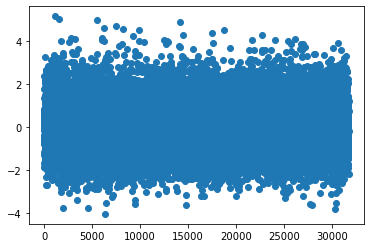

In [133]:
plt.scatter(np.arange(len(phe_table['pheno'])),phe_table['pheno'])

# PERFORM THE ASSOCIATION

In [134]:
results = {}

In [135]:
results['phecode'] = np.array(phe_table.columns[3:])

In [136]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    cc, p_val = scipy.stats.pearsonr(phe_table['pheno'], phe_table[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [137]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [138]:
results = results.dropna()

In [139]:
results

,phecode,ccs,p_vals
64,110.1,-0.001522,0.786341
65,110.11,0.000615,0.912810
66,110.12,-0.004953,0.377789
67,110.13,-0.000707,0.899874
71,112.3,-0.003010,0.591996
...,...,...,...
1832,964.1,-0.005710,0.309181
1834,965.1,-0.006051,0.281205
1836,965.3,-0.003675,0.512775
1843,972.2,-0.003666,0.513830


In [140]:
log_corr_p = - np.log10(results['p_vals'])

In [141]:
log_corr_p

64      0.104389
65      0.039620
66      0.422750
67      0.045818
71      0.227681
          ...   
1832    0.509787
1834    0.550977
1836    0.290073
1843    0.289180
1863    1.328913
Name: p_vals, Length: 960, dtype: float64

In [142]:
results['log_cor']=log_corr_p

In [143]:
results.to_csv("hw_phewas_results.csv",index=False)

# ANalyize and Plot


Bonferroni correction

In [144]:
results=pd.read_csv("hw_phewas_results.csv")

In [145]:
len(results)

960

In [146]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [147]:
p_bonf

2.679528403001072e-05

In [148]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

Number of correlations reaching Bonferroni threshold = 14


In [149]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [150]:
relevant

array([[ 2.72110000e+02, -2.88638888e-02,  2.72939074e-07,
         6.56393429e+00],
       [ 2.78100000e+02, -4.08323232e-02,  3.47525647e-13,
         1.24590131e+01],
       [ 3.94200000e+02, -3.46819960e-02,  6.48665119e-10,
         9.18797946e+00],
       [ 3.95100000e+02, -3.38123007e-02,  1.71094090e-09,
         8.76676499e+00],
       [ 4.01100000e+02, -4.11072881e-02,  2.41408687e-13,
         1.26172471e+01],
       [ 4.11200000e+02, -4.40903850e-02,  3.97986303e-15,
         1.44001319e+01],
       [ 4.11300000e+02, -2.46361173e-02,  1.14431543e-05,
         4.94145424e+00],
       [ 4.11400000e+02, -3.55816573e-02,  2.32028263e-10,
         9.63445911e+00],
       [ 4.11800000e+02, -3.23712958e-02,  8.10386658e-09,
         8.09130772e+00],
       [ 4.25100000e+02, -3.43976166e-02,  8.93050565e-10,
         9.04912395e+00],
       [ 4.27110000e+02, -2.98766389e-02,  1.02799323e-07,
         6.98800975e+00],
       [ 4.27200000e+02, -6.56078125e-02,  1.33245547e-31,
      

In [151]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])

In [152]:
print(tabulate(table))

-------------------------------------------------  ---------------------  ----------------------
PheCode                                            CorCoef                P_VAL
Hypercholesterolemia                               -0.02886388879400413   2.7293907418898177e-07
Obesity                                            -0.04083232324491755   3.4752564665465915e-13
Mitral valve disease                               -0.034681996030586616  6.48665118502823e-10
Nonrheumatic mitral valve disorders                -0.03381230066430326   1.7109408975770496e-09
Essential hypertension                             -0.04110728809690108   2.414086869846797e-13
Myocardial infarction                              -0.044090384964456636  3.9798630321598335e-15
Angina pectoris                                    -0.02463611726131625   1.1443154331558662e-05
Coronary atherosclerosis                           -0.03558165729098727   2.3202826332599636e-10
Other chronic ischemic heart disease, unspecified 

In [153]:
categories = []
for i in range(len(results)):
    categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])

In [154]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [155]:
len(np.unique(results['categories']))

17

In [156]:
pal1 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue']


In [157]:
pal2 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green']


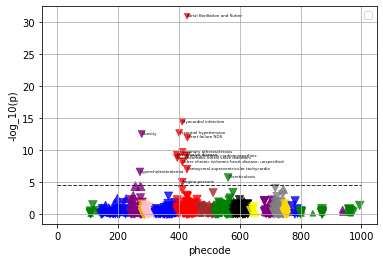

In [158]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'], y=positive_cor['log_cor'], size=positive_cor['ccs'],
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal2, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'], y=negative_cor['log_cor'], size=negative_cor['ccs'], hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal2, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    plt.text(x= sig['phecode'],
             y= sig['log_cor'],
             s = phemap.get_phecode_info(sig['phecode'])['phenotype'],
             fontdict=dict(color='black',size=4)) 
plt.ylabel('-log_10(p)')
plt.legend([])
plt.grid()
plt.savefig("foo2.png",dpi=200)

In [159]:
np.unique(results['categories'])

array(['circulatory system', 'congenital anomalies', 'dermatologic',
       'digestive', 'endocrine/metabolic', 'genitourinary',
       'hematopoietic', 'infectious diseases', 'injuries & poisonings',
       'mental disorders', 'musculoskeletal', 'neoplasms', 'neurological',
       'pregnancy complications', 'respiratory', 'sense organs',
       'symptoms'], dtype=object)

# Get EF LVED and LVES

22420-2.0 and 22420-3.0 Ejection Fraction <br>
22421	LV end diastolic volume <br>
22422   Left ventricular size and function  


In [16]:
isIn = []
for idx in np.array(df['eid']):
    isIn.append(idx in np.array(imaging['idx']))

In [20]:
df=df[isIn]

In [ ]:
df.to_csv("main_df_relevant_ids.csv",index=False)

In [ ]:
df['22420-2.0']

In [5]:
df = pd.read_csv("main_df_relevant_ids.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,39,40,44,45,46,366,367,2827,2828,2835,2836,3257) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
new_dic = {
"idx" : np.array(df['eid']),
"EF1" : np.array(df['22420-2.0']),
"EF2" : np.array(df['22420-3.0']),
"LVED1": np.array(df['22421-2.0']),
"LVED2": np.array(df['22421-3.0']),
"LVES1": np.array(df['22422-2.0']),
"LVES2": np.array(df['22422-3.0'])
}

In [15]:
pd.DataFrame.from_dict(new_dic).to_csv("main_df_relevant_ids.csv",index=False)